### Load dataset and select relevant columns

In [58]:
import pandas as pd

df = pd.read_csv("data/raw_data.csv")

df = df[["Politikbereich","Zweck"]]
df.head(5)

,Politikbereich,Zweck
0,Verkehr,"Nord-Süd-Tangente; Linie 26/27, 2.2. Teil-BPU,A"
1,Bildung,Gedenken zu 30 Jahre Mauerfall
2,Stadtentwicklung,Lernen Na Logo - Bildungsnetzwerk Hellersdorfe...
3,Jugend,Kinder- und Jugendambulanz
4,Jugend,Therapiebad


### Check missing and unique values

In [59]:
print(f"Total entries: {len(df)}\n")
print(f"Missing values by attribute/class: \n{df.isnull().sum()}\n")
print(f"Unique values by attribute/class: \n{df.nunique()}")

Total entries: 2000

Missing values by attribute/class: 
Politikbereich    0
Zweck             0
dtype: int64

Unique values by attribute/class: 
Politikbereich      24
Zweck             1125
dtype: int64


Observation: There are 875 non unique values for Zweck. This mean that some observations are either duplicates, or misleading (same Zweck but different class label), or both.

In [60]:
n = len(df)
df = df.drop_duplicates()
print(f"Number of removed duplicate observations in the dataset: {n-len(df)}")
print(f"Number of remaining observations in the dataset: {len(df)}")

temp_df = df[~df.index.isin(df.drop_duplicates(subset=["Zweck"], keep=False).index)]
temp_df

Number of removed duplicate observations in the dataset: 873
Number of remaining observations in the dataset: 1127


,Politikbereich,Zweck
278,Integration,Join in - Berufsbezogene Deutsch-Förderung für...
298,Arbeit,Join in - Berufsbezogene Deutsch-Förderung für...
1479,Soziales,Kontaktstelle PflegeEngagement Treptow-Köpenick
1480,Pflege,Kontaktstelle PflegeEngagement Treptow-Köpenick


Altough these 2 sets of observations contain same class tag but different description might be misleading, I will keep them for now.

### Data distribution by Politikbereich (check is dataset is balanced)

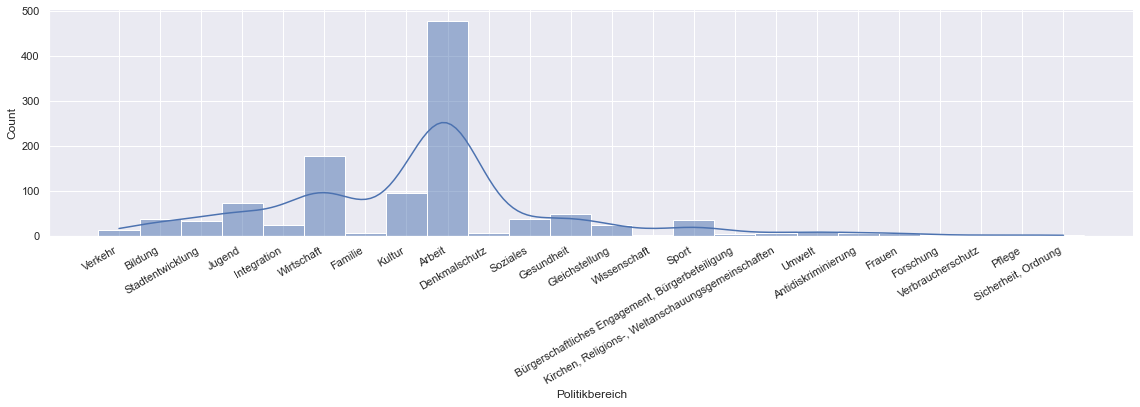

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=df, x="Politikbereich", height=4, aspect=4, kde=True)
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

As observed, the dataset is not balanced. In the next notebook I will generate more training data to overcome this issue.

In [62]:
df.to_csv("data/preprocessed_data.csv", index = False)